In [100]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [101]:
data = pd.read_csv("D:/Python DataScience/KaggleSelfChallenges/Titanic Dataset/train.csv")

In [102]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
# Dropping id,name,Ticket,cabin column (doesnt make sense to include them)
"""
Why did we drop these columns ?
id , name , ticket and cabin number doesnt look like to contribute much in our
predictions based on the intution.
We can always come back and try again with different approach if accuracy is not 
good

"""
X= data.drop(["PassengerId","Name","Ticket","Cabin",],axis =1)
y = pd.DataFrame(X["Survived"])

In [105]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [106]:
# Drop the survived columns from your features 
X.drop(["Survived"],axis=1,inplace = True)

In [107]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [108]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


0    549
1    342
Name: Survived, dtype: int64


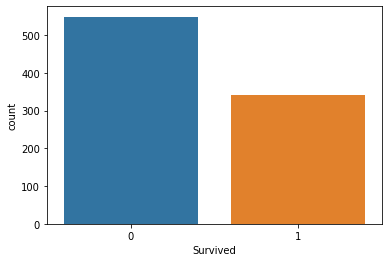

In [109]:
## number of people survived and died
## Survival Analysis
sns.countplot(y["Survived"])
print(y["Survived"].value_counts())

In [110]:
# Male and Female Percentage  Survived 
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [111]:
## Null values analysis 
x  = X.isnull().sum()
x[x>0]

Age         177
Embarked      2
dtype: int64

In [112]:
# Age, Embarked has null values 
#(Embarked has very less null values so we can drop those two rows or fill with mode)
# Why mode ? because its a categorical variable

# Age - lets find mean and median age
X["Age"].mean()

29.69911764705882

In [113]:
X["Age"].median()

28.0

In [114]:
X["Embarked"].value_counts()
# S is the most repeated value

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [115]:
X["Embarked"].mode()

0    S
dtype: object

<b> Observation</b>

Both mean and median are almost similar so we can fill the null values of the age by mean or median.

Embarked column can be filled by S(mode) where null values are present

In [116]:
X["Age"].fillna(X["Age"].mean(),inplace=True)
X["Embarked"].fillna(X["Embarked"].mode()[0],inplace=True)

In [117]:
## So now we have no null values 
x  = X.isnull().sum()
x[x>0]

Series([], dtype: int64)

In [118]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Handling categorical data 

We can use different type of encodings depending upon your data.
Here we have two Categorical Variables Sex and Embarked 

Both are nominal features so we can simply do LabelEncoding 

(nominal features  doesnt follow any specific order)

(ordinal features are better to be onehotencoded or binaryencoded)

In [121]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
X['Sex']= labelenc.fit_transform(X['Sex'])
X['Embarked']=labelenc.fit_transform(X['Embarked'])


In [122]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)
scaler = StandardScaler()

# We dont fit our test data just transform it 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Logistic Regression 

In [135]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train,y_train)

C:\Users\harshvardhan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
## Accuracy 
logreg.score(X_train,y_train)

0.812199036918138

## KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)

C:\Users\harshvardhan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [137]:
## Accuracy
knn.score(X_train,y_train)

0.8619582664526485

## Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [138]:
## Accuracy
tree.score(X_train,y_train)

0.9839486356340289

## Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train,y_train)

C:\Users\harshvardhan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [141]:
## Accuracy
forest.score(X_train,y_train)

0.9662921348314607

## Test data accuracy and confusion matrix

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [144]:
## Decision Tree
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [145]:
cm

array([[135,  19],
       [ 39,  75]], dtype=int64)

In [146]:
accuracy

0.7835820895522388

In [147]:
## Random Forest
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [148]:
cm

array([[137,  17],
       [ 41,  73]], dtype=int64)

In [149]:
accuracy

0.7835820895522388

## Doing Some Feature Selection

In [151]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [152]:
sfs = SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
          k_features=7,
          forward = True,
          floating = False,
          verbose =2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs=-1         
         ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    4.3s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    6.0s finished

[2020-04-15 23:32:34] Features: 1/7 -- score: 0.7960711331679075[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.2s finished

[2020-04-15 23:32:37] Features: 2/7 -- score: 0.805717535153019[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished

[2020-04-15 23:32:41] Features: 3/7 -- score: 0.8025744416873448[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.1s finished

[2020-04-15 23:32:43] Features: 4/7 -- score: 0.8025744

In [153]:
sfs.k_feature_names_

('0', '1', '2', '3', '4', '5', '6')

In [154]:
sfs.k_score_

0.7865281224152192

In [155]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.8653846153846154, 0.7628205128205128, 0.807...",0.796071,"(1,)",0.0731018,0.0456037,0.0263293
2,"(1, 3)","[0.8525641025641025, 0.782051282051282, 0.8205...",0.805718,"(1, 3)",0.0532599,0.0332255,0.0191828
3,"(1, 3, 5)","[0.7884615384615384, 0.7884615384615384, 0.826...",0.802574,"(1, 3, 5)",0.0254243,0.0158606,0.00915713
4,"(0, 1, 3, 5)","[0.8012820512820513, 0.8012820512820513, 0.801...",0.802574,"(0, 1, 3, 5)",0.00358825,0.00223849,0.00129239
5,"(0, 1, 3, 5, 6)","[0.782051282051282, 0.8012820512820513, 0.8012...",0.800993,"(0, 1, 3, 5, 6)",0.0211465,0.013192,0.00761639
6,"(0, 1, 2, 3, 5, 6)","[0.7948717948717948, 0.7948717948717948, 0.782...",0.792949,"(0, 1, 2, 3, 5, 6)",0.0106291,0.00663082,0.00382831
7,"(0, 1, 2, 3, 4, 5, 6)","[0.782051282051282, 0.7948717948717948, 0.7756...",0.786528,"(0, 1, 2, 3, 4, 5, 6)",0.0128607,0.00802297,0.00463206


## HyperParameter Optimization

In [161]:
from sklearn.model_selection import RandomizedSearchCV
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [162]:
import xgboost
classifier = xgboost.XGBClassifier()

In [163]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=0)

In [164]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 189 tasks      | elapsed:   23.9s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   30.4s finished
C:\Users\harshvardhan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\harshvardhan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'bo

In [165]:
random_cv.best_estimator_

XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [167]:
classifier = xgboost.XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [168]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [169]:
cm

array([[137,  17],
       [ 32,  82]], dtype=int64)

In [170]:
accuracy

0.8171641791044776